# <center>**Avito_Cars **

## Notebook mini-projet Data Mining : Prédiction des prix des voitures à partir des offres sur avito.ma 

Réalisé par : Hajar BENJARNIJ & Latifa BENIDDER

## Import libraries

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
import datetime

## Define a Edge webdriver 

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 6.78M/6.78M [00:07<00:00, 903kB/s]


<selenium.webdriver.chrome.webdriver.WebDriver (session="66af24570d2892f284e203c970877f4e")>

## Opening url page

In [ ]:

driver.get("https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre")

In [ ]:
start = time.time()
 
# will be used in the while loop
initialScroll = 0
finalScroll = 1000
 
while True:
    driver.execute_script(f"window.scrollTo({initialScroll},{finalScroll})")
    # this command scrolls the window starting from
    # the pixel value stored in the initialScroll
    # variable to the pixel value stored at the
    # finalScroll variable
    initialScroll = finalScroll
    finalScroll += 1000
    # we will stop the script for 3 seconds so that
    # the data can load
    time.sleep(3)
    # You can change it as per your needs and internet speed
 
    end = time.time()
 
    # We will scroll for 20 seconds.
    # You can change it as per your needs and internet speed
    if round(end - start) > 20:
        break

## Récupération des urls des offres des ventes des voitures

In [ ]:

url1=[]
for i in range(1,50): # on a choisie de parcourir les 50 premières pages
    url = 'https://www.avito.ma/fr/maroc/voiture--%C3%A0_vendre?o={}'.format(i)

    results = driver.find_elements(By.XPATH,'//*[@id="__next"]/div/main/div/div[6]/div[1]/div/div[2]/div/a')
    for link_element in results:
        link_href = link_element.get_attribute('href')
        url1.append(link_href)

## How much url i have

In [ ]:
len(url1)

1715

1. Récupération des titres des offres

In [ ]:
# Ajout les titres des 100 premiers offres
L=[]
for i in range(0,100):
    link = url1[i]
    driver.get(link)
    Type=driver.find_elements(By.XPATH,"//li[contains(@class, 'sc-qmn92k-1 ldnQxr')]")       
    l=[]
    for element in Type:
        l.append(element.text.split('\n'))
    L.append(l)

In [ ]:
len(L)

100

In [ ]:
for i in range(101,300):
    link = url1[i]
    driver.get(link)
    Type=driver.find_elements(By.XPATH,"//li[contains(@class, 'sc-qmn92k-1 ldnQxr')]")       
    l=[]
    for element in Type:
        l.append(element.text.split('\n'))
    L.append(l)

In [ ]:
len(L)

299

In [ ]:
for i in range(301,500):
    link = url1[i]
    driver.get(link)
    Type=driver.find_elements(By.XPATH,"//li[contains(@class, 'sc-qmn92k-1 ldnQxr')]")       
    l=[]
    for element in Type:
        l.append(element.text.split('\n'))
    L.append(l)

In [ ]:
L=[]
for i in range(1000,1500):
    link = url1[i]
    driver.get(link)
    Type=driver.find_elements(By.XPATH,"//li[contains(@class, 'sc-qmn92k-1 ldnQxr')]")       
    l=[]
    for element in Type:
        l.append(element.text.split('\n'))
    L.append(l)

In [ ]:
len(L)

500

In [ ]:
# Liste des titres 
L

[[['Type', "Voitures d'occasion, à vendre"],
  ['Origine', 'Dédouanée'],
  ['Modèle', '220'],
  ['Kilométrage', '200 000 - 249 999'],
  ['Année-Modèle', '2006'],
  ['Première main', 'Non'],
  ['État', 'Excellent'],
  ['Nombre de portes', '5'],
  ['Marque', 'Mercedes-Benz']],
 [['Type', "Voitures d'occasion, à vendre"],
  ['Modèle', 'Ibiza'],
  ['Marque', 'Seat'],
  ['Kilométrage', '130 000 - 139 999'],
  ['Année-Modèle', '2011']],
 [['Type', "Voitures d'occasion, à vendre"],
  ['Modèle', 'Uno'],
  ['Année-Modèle', '1996'],
  ['État', 'Bon'],
  ['Kilométrage', '200 000 - 249 999'],
  ['Nombre de portes', '5'],
  ['Première main', 'Non'],
  ['Origine', 'WW au Maroc'],
  ['Marque', 'Fiat']],
 [['Type', "Voitures d'occasion, à vendre"],
  ['Secteur', 'Hay Salam'],
  ['Modèle', 'A7'],
  ['Origine', 'WW au Maroc'],
  ['Année-Modèle', '2016'],
  ['Première main', 'Oui'],
  ['Marque', 'Audi'],
  ['Kilométrage', '90 000 - 94 999'],
  ['État', 'Excellent'],
  ['Nombre de portes', '5']],
 [['Type

In [ ]:
# Initialisation des listes qui vont contenir le type, le modèle, la marque,l'intervalle de kilométrage, l'etat, l'année du modèle
# est ce qu'elle est première main pi non?, nombre des portes, l'origine et le secteur.
Type=[None for i in range(len(L))]
Model=[None for i in range(len(L))]
Marque=[None for i in range(len(L))]
Kilometrage=[None for i in range(len(L))]
Etat=[None for i in range(len(L))]
Annee_Modele=[None for i in range(len(L))]
Premiere_main=[None for i in range(len(L))]
Nombre_de_portes=[None for i in range(len(L))]
Origine=[None for i in range(len(L))]
Secteur=[None for i in range(len(L))]

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Modèle":
            Model[i]=e[1]
        else:
            continue   

In [ ]:
len(Model)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Type":
            Type[i]=e[1]
        else:
            continue 

In [ ]:
len(Type)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Marque":
            Marque[i]=e[1]
        else:
            continue

In [ ]:
len(Marque)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Kilométrage":
            Kilometrage[i]=e[1]
        else:
            continue

In [ ]:
len(Kilometrage)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="État":
            Etat[i]=e[1]
        else:
            continue

In [ ]:
len(Etat)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Année-Modèle":
            Annee_Modele[i]=e[1]
        else:
            continue

In [ ]:
len(Annee_Modele)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Première main":
            Premiere_main[i]=e[1]
        else:
            continue

In [ ]:
len(Premiere_main)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Nombre de portes":
            Nombre_de_portes[i]=e[1]
        else:
            continue

In [ ]:
len(Nombre_de_portes)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Origine":
            Origine[i]=e[1]
        else:
            continue

In [ ]:
len(Origine)

500

In [ ]:
for i in range(len(L)):
    for e in L[i]:
        if e[0]=="Secteur":
            Secteur[i]=e[1]
        else:
            continue

In [ ]:
len(Secteur)

500

In [ ]:
Prices=[]
title=[]
location=[]
time_publication=[]

In [ ]:
for i in range(1000,1500):
    link = url1[i]
    driver.get(link)
    Prices.append(driver.find_element(By.XPATH,"/html/body/div[1]/div/main/div/div[2]/div[1]/div[2]/div[1]/div[1]/div[2]/div[1]/div[1]/div[2]/p").text)
    title.append(driver.find_element(By.XPATH,"/html/body/div[1]/div/main/div/div[2]/div[1]/div[2]/div[1]/div[1]/div[2]/div[1]/div[1]/div[1]/h1").text)
    location.append(driver.find_element(By.XPATH,"/html/body/div[1]/div/main/div/div[2]/div[1]/div[2]/div[1]/div[1]/div[2]/div[1]/div[2]/span[1]").text)
    time_publication.append(driver.find_element(By.XPATH,"/html/body/div[1]/div/main/div/div[2]/div[1]/div[2]/div[1]/div[1]/div[2]/div[1]/div[2]/span[2]/time").text)

In [ ]:

Prices = Prices[:779]

In [ ]:

title = title[:779]

In [ ]:

Type = Type[:779]

In [ ]:
len(Type)

779

In [ ]:
Model=Model[:779]

In [ ]:
Marque=Marque[:779]

In [ ]:
Kilometrage=Kilometrage[:779]

In [ ]:
Etat=Etat[:779]

In [ ]:
Annee_Modele=Annee_Modele[:779]

In [ ]:
Premiere_main=Premiere_main[:779]

In [ ]:
Nombre_de_portes=Nombre_de_portes[:779]

In [ ]:
Origine=Origine[:779]

In [ ]:
Secteur=Secteur[:779]

In [ ]:
time_publication=time_publication[:779]

In [ ]:
location=location[:779]

In [ ]:
len(location)

780

## final dataset

In [ ]:
import pandas as pd
d={"Prices":Prices,"title":title,"location":location,"time_publication":time_publication,"Type":Type,"Model":Model,"Marque":Marque,
  "Kilometrage":Kilometrage,"Etat":Etat,"Annee_Modele":Annee_Modele,"Premiere_main":Premiere_main,"Nombre_de_portes":Nombre_de_portes,"Origine":Origine,"Secteur":Secteur}
data=pd.DataFrame(d)
data

,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,115 000 DH,MERCEDES C220,Meknès,il y a 56 minutes,"Voitures d'occasion, à vendre",220,Mercedes-Benz,200 000 - 249 999,Excellent,2006,Non,5,Dédouanée,None
1,PRIX NON SPÉCIFIÉ,seat ibiza,Temara,il y a 56 minutes,"Voitures d'occasion, à vendre",Ibiza,Seat,130 000 - 139 999,None,2011,None,None,None,None
2,25 000 DH,Fiat uno,Marrakech,il y a 56 minutes,"Voitures d'occasion, à vendre",Uno,Fiat,200 000 - 249 999,Bon,1996,Non,5,WW au Maroc,None
3,470 000 DH,Audi a7 quattro S line,Agadir,il y a 57 minutes,"Voitures d'occasion, à vendre",A7,Audi,90 000 - 94 999,Excellent,2016,Oui,5,WW au Maroc,Hay Salam
4,60 000 DH,BMW x5 Diesel 2005,Casablanca,il y a 57 minutes,"Voitures d'occasion, à vendre",X5,BMW,250 000 - 299 999,Excellent,2005,Oui,5,Importée neuve,Californie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006,Non,5,WW au Maroc,None
496,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021,Oui,5,WW au Maroc,Autre secteur
497,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019,Oui,5,WW au Maroc,2 Mars
498,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,None,2002,None,None,Dédouanée,None


In [ ]:
data.to_csv(r"C:\Users\HP\Downloads\avito2.csv")

In [ ]:
import pandas as pd 
df1=pd.read_csv(r"C:\Users\HP\Downloads\avito.csv")
df1    http://localhost:8888/edit/avito_final.csv

,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,520 000 DH,Bmw 135 i,Tanger,il y a 1 heure,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,26 000 DH,Peugeot,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,774,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Tucson,Hyundai,40 000 - 44 999,6,2021.0,Oui,5.0,WW au Maroc,Californie
775,775,167 000 DH,Hyundai accent,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Sport,Land Rover,75 000 - 79 999,6,2014.0,Oui,5.0,Importée neuve,2 Mars
776,776,PRIX NON SPÉCIFIÉ,PASSAT,Agadir,il y a 2 heures,"Voitures d'occasion, à vendre",CLASSE C COUPE,Mercedes-Benz,80 000 - 84 999,Excellent,2017.0,Non,5.0,Dédouanée,2 Mars
777,777,PRIX NON SPÉCIFIÉ,Hyundai i10 Automatic,Agadir,il y a 2 heures,"Voitures d'occasion, à vendre",CLASSE C COUPE,Mercedes-Benz,130 000 - 139 999,Excellent,2016.0,Non,3.0,Importée neuve,Toute la ville


In [ ]:
df2=pd.read_csv(r"C:\Users\HP\Downloads\avito2.csv")
df2

,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,115 000 DH,MERCEDES C220,Meknès,il y a 56 minutes,"Voitures d'occasion, à vendre",220,Mercedes-Benz,200 000 - 249 999,Excellent,2006.0,Non,5.0,Dédouanée,NaN
1,1,PRIX NON SPÉCIFIÉ,seat ibiza,Temara,il y a 56 minutes,"Voitures d'occasion, à vendre",Ibiza,Seat,130 000 - 139 999,NaN,2011.0,NaN,NaN,NaN,NaN
2,2,25 000 DH,Fiat uno,Marrakech,il y a 56 minutes,"Voitures d'occasion, à vendre",Uno,Fiat,200 000 - 249 999,Bon,1996.0,Non,5.0,WW au Maroc,NaN
3,3,470 000 DH,Audi a7 quattro S line,Agadir,il y a 57 minutes,"Voitures d'occasion, à vendre",A7,Audi,90 000 - 94 999,Excellent,2016.0,Oui,5.0,WW au Maroc,Hay Salam
4,4,60 000 DH,BMW x5 Diesel 2005,Casablanca,il y a 57 minutes,"Voitures d'occasion, à vendre",X5,BMW,250 000 - 299 999,Excellent,2005.0,Oui,5.0,Importée neuve,Californie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006.0,Non,5.0,WW au Maroc,NaN
496,496,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Autre secteur
497,497,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019.0,Oui,5.0,WW au Maroc,2 Mars
498,498,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,NaN,2002.0,NaN,NaN,Dédouanée,NaN


## concatenate vertically

In [ ]:
df_concat1 = pd.concat([df1, df2])

In [ ]:
df4=pd.read_csv(r"C:\Users\HP\Downloads\data_218.csv")
df4

,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,630 000 DH,Range Rover Sport 11/2019,Casablanca,il y a 23 minutes,"Voitures d'occasion, à vendre",Range Rover Sport,Land Rover,80 000 - 84 999,Excellent,2019,Oui,5.0,WW au Maroc,Autre secteur
1,1,PRIX NON SPÉCIFIÉ,Mercedes-Benz class CLS Diesel,Casablanca,il y a 24 minutes,"Voitures d'occasion, à vendre",Classe CLS,Mercedes-Benz,35 000 - 39 999,Très bon,2018,Oui,5.0,WW au Maroc,Val Fleuri
2,2,PRIX NON SPÉCIFIÉ,Audi RSQ3,Casablanca,il y a 24 minutes,"Voitures d'occasion, à vendre",RSQ3,Audi,25 000 - 29 999,Excellent,2021,Oui,5.0,Importée neuve,Californie
3,3,490 000 DH,Audi S Q5,Marrakech,il y a 24 minutes,"Voitures d'occasion, à vendre",sq5,Audi,120 000 - 129 999,Excellent,2017,Oui,5.0,Importée neuve,Guéliz
4,4,PRIX NON SPÉCIFIÉ,Cadillac Escalade V8 2022,Casablanca,il y a 24 minutes,"Voitures d'occasion, à vendre",Escalade,Cadillac,0 - 4 999,6,2022,Oui,5.0,Importée neuve,Bourgogne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,PRIX NON SPÉCIFIÉ,Golf 7 2015 GTD diwana 2021,Casablanca,il y a 15 heures,"Voitures d'occasion, à vendre",GOLF 7,Volkswagen,100 000 - 109 999,Bon,2015,Non,5.0,Dédouanée,Aïn Chock
214,214,87 000 DH,Dacia logan Diesel 2015,Fès,il y a 15 heures,"Voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015,Oui,5.0,WW au Maroc,Agdal
215,215,118 000 DH,Fiat 500 Essence 2018,Casablanca,il y a 15 heures,"Voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018,Oui,3.0,WW au Maroc,Maarif
216,216,PRIX NON SPÉCIFIÉ,SKODA OCTAVIA 2018,Agadir,il y a 15 heures,"Voitures d'occasion, à vendre",Octavia,Skoda,80 000 - 84 999,NaN,2018,NaN,NaN,NaN,NaN


In [ ]:
df5=pd.read_csv(r"C:\Users\HP\Downloads\avito_final (1).csv")
df5

,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,520 000 DH,Bmw 135 i,Tanger,il y a 1 heure,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,26 000 DH,Peugeot,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1274,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006.0,Non,5.0,WW au Maroc,NaN
1275,1275,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Autre secteur
1276,1276,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019.0,Oui,5.0,WW au Maroc,2 Mars
1277,1277,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,NaN,2002.0,NaN,NaN,Dédouanée,NaN


In [ ]:
df_concat2 = pd.concat([df4, df5])

In [ ]:
df_concat = pd.concat([df_concat1,df_concat2])

In [ ]:
df_concat

,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,520 000 DH,Bmw 135 i,Tanger,il y a 1 heure,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,26 000 DH,Peugeot,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1274,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006.0,Non,5.0,WW au Maroc,NaN
1275,1275,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Autre secteur
1276,1276,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019.0,Oui,5.0,WW au Maroc,2 Mars
1277,1277,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,NaN,2002.0,NaN,NaN,Dédouanée,NaN


In [ ]:
df_concat.shape

(2776, 15)

## reset the index

In [ ]:
df_concat = df_concat.reset_index()
df_concat

,index,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,0,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,1,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,2,520 000 DH,Bmw 135 i,Tanger,il y a 1 heure,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,3,26 000 DH,Peugeot,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,1274,1274,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006.0,Non,5.0,WW au Maroc,NaN
2772,1275,1275,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Autre secteur
2773,1276,1276,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019.0,Oui,5.0,WW au Maroc,2 Mars
2774,1277,1277,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,NaN,2002.0,NaN,NaN,Dédouanée,NaN


In [ ]:
df_concat = df_concat.drop(['index','Unnamed: 0'], axis=1)

In [ ]:
df_concat

,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520 000 DH,Bmw 135 i,Tanger,il y a 1 heure,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26 000 DH,Peugeot,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006.0,Non,5.0,WW au Maroc,NaN
2772,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Autre secteur
2773,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019.0,Oui,5.0,WW au Maroc,2 Mars
2774,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,NaN,2002.0,NaN,NaN,Dédouanée,NaN


In [ ]:
df_concat.to_csv(r"C:\Users\HP\Downloads\avito_final.csv")

![360_F_298861845_uVcz10TjPNcxPSSLIqty0clp4pQVwt4g.jpg](attachment:360_F_298861845_uVcz10TjPNcxPSSLIqty0clp4pQVwt4g.jpg)

In [ ]:
import pandas as pd 
df_concat=pd.read_csv(r"C:\Users\HP\Downloads\avito_final.csv")

In [ ]:
df_concat.shape

(2776, 15)

In [ ]:
df_concat


,Unnamed: 0,Prices,title,location,time_publication,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,280 000 DH,Range rover evoque,Marrakech,il y a 1 heure,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,520 000 DH,Bmw 135 i,Tanger,il y a 1 heure,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,26 000 DH,Peugeot,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,il y a 1 heure,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2771,59 000 DH,Honda jazz,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Jazz,Honda,140 000 - 149 999,Très bon,2006.0,Non,5.0,WW au Maroc,NaN
2772,2772,PRIX NON SPÉCIFIÉ,Dacia sandero,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",Sandero,Dacia,30 000 - 34 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Autre secteur
2773,2773,215 000 DH,Kia Sportage 2019 diesel automatique,Casablanca,il y a 1 heure,"Voitures d'occasion, à vendre",Sportage,Kia,65 000 - 69 999,Excellent,2019.0,Oui,5.0,WW au Maroc,2 Mars
2774,2774,PRIX NON SPÉCIFIÉ,Audi A4,Rabat,il y a 1 heure,"Voitures d'occasion, à vendre",A4,Audi,250 000 - 299 999,NaN,2002.0,NaN,NaN,Dédouanée,NaN


In [ ]:
df_concat = df_concat.drop(['time_publication',"Unnamed: 0"], axis=1)


# drop_duplicates

In [ ]:
df_concat = df_concat.drop_duplicates()

In [ ]:
df_concat.shape

(344, 13)

# Tester

In [ ]:
df_concat[df_concat["title"]=="Range rover evoque"]

,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
106,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
316,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
526,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
1474,270 000 DH,Range rover evoque,Casablanca,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,100 000 - 109 999,Excellent,2017.0,Oui,5.0,WW au Maroc,Bourgogne
1489,410 000 DH,Range rover evoque,Casablanca,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune


## info about df_concat

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 1496
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prices            344 non-null    object 
 1   title             344 non-null    object 
 2   location          344 non-null    object 
 3   Type              342 non-null    object 
 4   Model             342 non-null    object 
 5   Marque            342 non-null    object 
 6   Kilometrage       342 non-null    object 
 7   Etat              313 non-null    object 
 8   Annee_Modele      342 non-null    float64
 9   Premiere_main     286 non-null    object 
 10  Nombre_de_portes  314 non-null    float64
 11  Origine           310 non-null    object 
 12  Secteur           229 non-null    object 
dtypes: float64(2), object(11)
memory usage: 37.6+ KB


# reset_index

In [ ]:
df_concat = df_concat.reset_index()
df_concat

,index,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,280 000 DH,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,520 000 DH,Bmw 135 i,Tanger,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,26 000 DH,Peugeot,Casablanca,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,118 000 DH,Hyundai accent Diesel 2016,Agadir Melloul,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,1492,PRIX NON SPÉCIFIÉ,Golf 7 2015 GTD diwana 2021,Casablanca,"Voitures d'occasion, à vendre",GOLF 7,Volkswagen,100 000 - 109 999,Bon,2015.0,Non,5.0,Dédouanée,Aïn Chock
340,1493,87 000 DH,Dacia logan Diesel 2015,Fès,"Voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,1494,118 000 DH,Fiat 500 Essence 2018,Casablanca,"Voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif
342,1495,PRIX NON SPÉCIFIÉ,SKODA OCTAVIA 2018,Agadir,"Voitures d'occasion, à vendre",Octavia,Skoda,80 000 - 84 999,NaN,2018.0,NaN,NaN,NaN,NaN


## Prices

In [ ]:
df_concat["Prices"].value_counts()

PRIX NON SPÉCIFIÉ    126
430 000 DH            12
215 000 DH            10
118 000 DH            10
45 000 DH              9
                    ... 
182 000 DH             1
460 000 DH             1
298 000 DH             1
245 000 DH             1
56 000 DH              1
Name: Prices, Length: 99, dtype: int64

In [ ]:
#Supprimer certains caracteres d une chaine de caracteres en utilisant .replace()
characters =["DH","\u202f"]
liste1 = []
for i in range(len(df_concat["Prices"])):
    string =df_concat["Prices"][i]
    for x in range(len(characters)):
        string= string.replace(characters[x],"")
    liste1.append(string)

In [ ]:
df_concat["Prices"]=liste1 

In [ ]:
# Supprimer les lignes où la valeur PRIX NON SPÉCIFIÉ apparaît dans la colonne Prices
df_concat.drop(df_concat[df_concat['Prices'] == "PRIX NON SPÉCIFIÉ"].index,inplace=True)

In [ ]:
df_concat

,index,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,280000,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,1,280000,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,2,520000,Bmw 135 i,Tanger,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,3,26000,Peugeot,Casablanca,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,4,118000,Hyundai accent Diesel 2016,Agadir Melloul,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1480,198000,Jeep renegade boite auto 2018,Casablanca,"Voitures d'occasion, à vendre",Renegade,Jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,1489,410000,Range rover evoque,Casablanca,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,1493,87000,Dacia logan Diesel 2015,Fès,"Voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,1494,118000,Fiat 500 Essence 2018,Casablanca,"Voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


In [ ]:
df_concat["Prices"].value_counts()

430000     12
118000     10
215000     10
45000       9
240000      8
           ..
182000      1
460000      1
298000      1
245000      1
56000       1
Name: Prices, Length: 98, dtype: int64

In [ ]:
df_concat = df_concat.drop(['index'], axis=1)

In [ ]:
df_concat

,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280000,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280000,Range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520000,Bmw 135 i,Tanger,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26000,Peugeot,Casablanca,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118000,Hyundai accent Diesel 2016,Agadir Melloul,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,198000,Jeep renegade boite auto 2018,Casablanca,"Voitures d'occasion, à vendre",Renegade,Jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,410000,Range rover evoque,Casablanca,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,87000,Dacia logan Diesel 2015,Fès,"Voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,118000,Fiat 500 Essence 2018,Casablanca,"Voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


## info about df_concat

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 343
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prices            218 non-null    object 
 1   title             218 non-null    object 
 2   location          218 non-null    object 
 3   Type              216 non-null    object 
 4   Model             216 non-null    object 
 5   Marque            216 non-null    object 
 6   Kilometrage       216 non-null    object 
 7   Etat              197 non-null    object 
 8   Annee_Modele      216 non-null    float64
 9   Premiere_main     180 non-null    object 
 10  Nombre_de_portes  202 non-null    float64
 11  Origine           195 non-null    object 
 12  Secteur           132 non-null    object 
dtypes: float64(2), object(11)
memory usage: 23.8+ KB


## convert the Prices column to float

In [ ]:
df_concat['Prices']=df_concat['Prices'].astype('float')

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 343
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prices            218 non-null    float64
 1   title             218 non-null    object 
 2   location          218 non-null    object 
 3   Type              216 non-null    object 
 4   Model             216 non-null    object 
 5   Marque            216 non-null    object 
 6   Kilometrage       216 non-null    object 
 7   Etat              197 non-null    object 
 8   Annee_Modele      216 non-null    float64
 9   Premiere_main     180 non-null    object 
 10  Nombre_de_portes  202 non-null    float64
 11  Origine           195 non-null    object 
 12  Secteur           132 non-null    object 
dtypes: float64(3), object(10)
memory usage: 23.8+ KB


## title

In [ ]:
df_concat['title'].value_counts()

Range rover evoque                         7
BMW x5 Diesel 2005                         5
Range Rover Evoque                         5
Renault                                    5
Audi a4 full rs4 importé neuve fin 2013    4
                                          ..
GLE 300d 4 Matic 36.000 Km                 1
volkswagen tiguan                          1
MERCEDES CLASSE A 200 CDI PAC AMG          1
JEEP SRT V8 6.4L HEMI 468Cv                1
Kia Picanto 2010                           1
Name: title, Length: 128, dtype: int64

In [ ]:
df_concat['title'] = df_concat['title'].str.lower()
df_concat

,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280000.0,range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280000.0,range rover evoque,Marrakech,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520000.0,bmw 135 i,Tanger,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26000.0,peugeot,Casablanca,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118000.0,hyundai accent diesel 2016,Agadir Melloul,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,198000.0,jeep renegade boite auto 2018,Casablanca,"Voitures d'occasion, à vendre",Renegade,Jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,410000.0,range rover evoque,Casablanca,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,87000.0,dacia logan diesel 2015,Fès,"Voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,118000.0,fiat 500 essence 2018,Casablanca,"Voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


## location

In [ ]:
df_concat['location'].value_counts()

Casablanca         116
Fès                 19
Tanger              15
Marrakech           13
Agadir              10
Oujda                6
Agadir Melloul       4
Sidi Bouzid          4
Berrechid            4
Tinghir              4
Fquih Ben Saleh      4
El Jadida            3
Rabat                3
Meknès               3
Salé                 2
Tétouan              2
Laâyoune             1
Kénitra              1
Mohammedia           1
Dar Bouazza          1
Essaouira            1
Sidi Kacem           1
Name: location, dtype: int64

In [ ]:
df_concat['location'] = df_concat['location'].str.lower()
df_concat

,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280000.0,range rover evoque,marrakech,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280000.0,range rover evoque,marrakech,"Voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520000.0,bmw 135 i,tanger,"Voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26000.0,peugeot,casablanca,"Voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118000.0,hyundai accent diesel 2016,agadir melloul,"Voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,198000.0,jeep renegade boite auto 2018,casablanca,"Voitures d'occasion, à vendre",Renegade,Jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,410000.0,range rover evoque,casablanca,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,87000.0,dacia logan diesel 2015,fès,"Voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,118000.0,fiat 500 essence 2018,casablanca,"Voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


In [ ]:
df_concat['location'] = df_concat['location'].replace("agadir melloul","agadir")

In [ ]:
df_concat['location'].value_counts()

casablanca         116
fès                 19
tanger              15
agadir              14
marrakech           13
oujda                6
sidi bouzid          4
berrechid            4
tinghir              4
fquih ben saleh      4
el jadida            3
rabat                3
meknès               3
salé                 2
tétouan              2
laâyoune             1
kénitra              1
mohammedia           1
dar bouazza          1
essaouira            1
sidi kacem           1
Name: location, dtype: int64

## Type

In [ ]:
df_concat['Type'] = df_concat['Type'].str.lower()
df_concat

,Prices,title,location,Type,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280000.0,range rover evoque,marrakech,"voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280000.0,range rover evoque,marrakech,"voitures d'occasion, à vendre",Serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520000.0,bmw 135 i,tanger,"voitures d'occasion, à vendre",205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26000.0,peugeot,casablanca,"voitures d'occasion, à vendre",Accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118000.0,hyundai accent diesel 2016,agadir,"voitures d'occasion, à vendre",Accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,198000.0,jeep renegade boite auto 2018,casablanca,"voitures d'occasion, à vendre",Renegade,Jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,410000.0,range rover evoque,casablanca,"voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,87000.0,dacia logan diesel 2015,fès,"voitures d'occasion, à vendre",Logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,118000.0,fiat 500 essence 2018,casablanca,"voitures d'occasion, à vendre",500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


In [ ]:
df_concat['Type'].value_counts()

voitures d'occasion, à vendre    216
Name: Type, dtype: int64

In [ ]:
df_concat = df_concat.drop(["Type"], axis=1)

## Model

In [ ]:
df_concat['Model'].value_counts()

Range Rover Evoque    13
A4                    10
Passat                 8
F-Type                 8
Accent                 7
                      ..
X1                     1
A5                     1
country man            1
Serie 2 coupé          1
Picanto                1
Name: Model, Length: 87, dtype: int64

In [ ]:
df_concat['Model'] = df_concat['Model'].str.lower()
df_concat

,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280000.0,range rover evoque,marrakech,range rover evoque,Land Rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280000.0,range rover evoque,marrakech,serie 1,BMW,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520000.0,bmw 135 i,tanger,205,Peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26000.0,peugeot,casablanca,accent,Hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118000.0,hyundai accent diesel 2016,agadir,accent,Hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...
327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,Jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,410000.0,range rover evoque,casablanca,range rover evoque,Land Rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,87000.0,dacia logan diesel 2015,fès,logan,Dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,118000.0,fiat 500 essence 2018,casablanca,500,Fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


In [ ]:
df_concat['Model'].value_counts()

range rover evoque    13
a4                    10
passat                 8
f-type                 8
accent                 7
                      ..
x1                     1
a5                     1
country man            1
serie 2 coupé          1
picanto                1
Name: Model, Length: 87, dtype: int64

## Marque

In [ ]:
df_concat['Marque'].value_counts()

Volkswagen       30
Land Rover       24
Hyundai          23
Mercedes-Benz    18
Peugeot          17
Audi             16
BMW              15
Fiat             14
Renault          12
Dacia             8
Jaguar            8
Kia               5
Chevrolet         4
Jeep              4
Citroen           3
Nissan            3
Ford              2
Toyota            2
Honda             1
Alfa Romeo        1
Cupra             1
mini              1
Volvo             1
Opel              1
Mitsubishi        1
Skoda             1
Name: Marque, dtype: int64

In [ ]:
df_concat['Marque'] = df_concat['Marque'].str.lower()
df_concat

,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur
0,280000.0,range rover evoque,marrakech,range rover evoque,land rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz
1,280000.0,range rover evoque,marrakech,serie 1,bmw,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville
2,520000.0,bmw 135 i,tanger,205,peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN
3,26000.0,peugeot,casablanca,accent,hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville
4,118000.0,hyundai accent diesel 2016,agadir,accent,hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa
...,...,...,...,...,...,...,...,...,...,...,...,...
327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars
336,410000.0,range rover evoque,casablanca,range rover evoque,land rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune
340,87000.0,dacia logan diesel 2015,fès,logan,dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal
341,118000.0,fiat 500 essence 2018,casablanca,500,fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif


In [ ]:
df_concat['Marque'].value_counts()

volkswagen       30
land rover       24
hyundai          23
mercedes-benz    18
peugeot          17
audi             16
bmw              15
fiat             14
renault          12
dacia             8
jaguar            8
kia               5
chevrolet         4
jeep              4
citroen           3
nissan            3
ford              2
toyota            2
honda             1
alfa romeo        1
cupra             1
mini              1
volvo             1
opel              1
mitsubishi        1
skoda             1
Name: Marque, dtype: int64

## Kilometrage

In [ ]:
# Rmove rows when Kilometrage is null
df_concat = df_concat[df_concat['Kilometrage'].notnull()]

In [ ]:
# Split column into two
Kilometrage = df_concat['Kilometrage'].str.split("-", expand = True)
Kilometrage

,0,1
0,65 000,69 999
1,30 000,34 999
2,15 000,19 999
3,95 000,99 999
4,50 000,54 999
...,...,...
327,80 000,84 999
336,50 000,54 999
340,90 000,94 999
341,50 000,54 999


In [ ]:
df_concat['Kilometrage_min']=Kilometrage[0]
df_concat['Kilometrage_max']=Kilometrage[1]

C:\Program Files\KMSpico\temp\ipykernel_14100\2401255159.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Program Files\KMSpico\temp\ipykernel_14100\2401255159.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_concat = df_concat.reset_index()
df_concat

,index,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,0,280000.0,range rover evoque,marrakech,range rover evoque,land rover,65 000 - 69 999,6,2016.0,NaN,5.0,WW au Maroc,Guéliz,65 000,69 999
1,1,280000.0,range rover evoque,marrakech,serie 1,bmw,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville,30 000,34 999
2,2,520000.0,bmw 135 i,tanger,205,peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN,15 000,19 999
3,3,26000.0,peugeot,casablanca,accent,hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville,95 000,99 999
4,4,118000.0,hyundai accent diesel 2016,agadir,accent,hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa,50 000,54 999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars,80 000,84 999
212,336,410000.0,range rover evoque,casablanca,range rover evoque,land rover,50 000 - 54 999,6,2021.0,Oui,5.0,WW au Maroc,Laimoune,50 000,54 999
213,340,87000.0,dacia logan diesel 2015,fès,logan,dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal,90 000,94 999
214,341,118000.0,fiat 500 essence 2018,casablanca,500,fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif,50 000,54 999


In [ ]:
#Supprimer certains caracteres d une chaine de caracteres en utilisant .replace()
liste2= []
for i in range(len(df_concat["Kilometrage_max"])):
    string =df_concat["Kilometrage_max"][i]
    string= string.replace(" ","")
    liste2.append(string)

In [ ]:
df_concat["Kilometrage_max"]=liste2

In [ ]:
#Supprimer certains caracteres d une chaine de caracteres en utilisant .replace()
liste2= []
for i in range(len(df_concat["Kilometrage_min"])):
    string =df_concat["Kilometrage_min"][i]
    string= string.replace(" ","")
    liste2.append(string)

In [ ]:
df_concat["Kilometrage_min"]=liste2

In [ ]:
df_concat['Kilometrage_min']=df_concat['Kilometrage_min'].astype('float')

In [ ]:
df_concat['Kilometrage_max']=df_concat['Kilometrage_max'].astype('float')

## Etat

In [ ]:
df_concat['Etat'].value_counts()

Excellent    77
Très bon     71
6            33
Bon          16
Name: Etat, dtype: int64

In [ ]:
df_concat['Etat'] = df_concat['Etat'].replace("6","Bon")
df_concat

,index,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,0,280000.0,range rover evoque,marrakech,range rover evoque,land rover,65 000 - 69 999,Bon,2016.0,NaN,5.0,WW au Maroc,Guéliz,65000.0,69999.0
1,1,280000.0,range rover evoque,marrakech,serie 1,bmw,30 000 - 34 999,Très bon,2019.0,NaN,NaN,NaN,Centre ville,30000.0,34999.0
2,2,520000.0,bmw 135 i,tanger,205,peugeot,15 000 - 19 999,Bon,1988.0,NaN,3.0,NaN,NaN,15000.0,19999.0
3,3,26000.0,peugeot,casablanca,accent,hyundai,95 000 - 99 999,Très bon,2016.0,Non,5.0,WW au Maroc,Toute la ville,95000.0,99999.0
4,4,118000.0,hyundai accent diesel 2016,agadir,accent,hyundai,50 000 - 54 999,Très bon,2021.0,Oui,5.0,WW au Maroc,Anfa,50000.0,54999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,jeep,80 000 - 84 999,Excellent,2018.0,Oui,5.0,WW au Maroc,2 Mars,80000.0,84999.0
212,336,410000.0,range rover evoque,casablanca,range rover evoque,land rover,50 000 - 54 999,Bon,2021.0,Oui,5.0,WW au Maroc,Laimoune,50000.0,54999.0
213,340,87000.0,dacia logan diesel 2015,fès,logan,dacia,90 000 - 94 999,Très bon,2015.0,Oui,5.0,WW au Maroc,Agdal,90000.0,94999.0
214,341,118000.0,fiat 500 essence 2018,casablanca,500,fiat,50 000 - 54 999,Très bon,2018.0,Oui,3.0,WW au Maroc,Maarif,50000.0,54999.0


In [ ]:
df_concat['Etat'].value_counts()

Excellent    77
Très bon     71
Bon          49
Name: Etat, dtype: int64

## Premiere_main

In [ ]:
df_concat['Premiere_main'].value_counts()

Oui    97
Non    83
Name: Premiere_main, dtype: int64

In [ ]:
df_concat.isna().sum()

index                0
Prices               0
title                0
location             0
Model                0
Marque               0
Kilometrage          0
Etat                19
Annee_Modele         0
Premiere_main       36
Nombre_de_portes    14
Origine             21
Secteur             84
Kilometrage_min      0
Kilometrage_max      0
dtype: int64

## Secteur

In [ ]:
df_concat['Secteur'].value_counts()

2 Mars               22
Centre Ville         17
Californie           15
Aïn Sebaâ             9
Yacoub El Mansour     5
Toute la ville        5
Aïn Chock             5
Ben Souda             4
Autre secteur         4
Guéliz                4
Anfa                  4
Av Mokawama           3
Agdal                 3
Bourgogne             3
Sidi Maarouf          2
Hay Riad              2
Centre ville          2
Centre                2
Narjis                2
Route de Meknes       2
CGI                   2
Ville Nouvelle        1
Laimoune              1
Daoudiate             1
Mers Sultan           1
Hay Salam             1
Belvédère             1
Oued Fès              1
Anoual Souss          1
Mimosas               1
Oulfa                 1
Branes 2              1
Agadir Oufella        1
Safir                 1
Val Fleuri            1
Maarif                1
Name: Secteur, dtype: int64

In [ ]:
df_concat['Secteur'] = df_concat['Secteur'].str.lower()

## Annee_Modele

In [ ]:
df_concat['Annee_Modele'].value_counts()

2017.0    29
2018.0    25
2016.0    20
2019.0    18
2013.0    15
2021.0    11
2015.0    11
2011.0    10
2020.0     9
2014.0     9
2012.0     8
2005.0     7
2008.0     6
2007.0     6
2010.0     6
2006.0     4
1994.0     4
2004.0     3
2022.0     3
2009.0     3
1988.0     2
1997.0     2
1996.0     1
2003.0     1
1982.0     1
2002.0     1
2000.0     1
Name: Annee_Modele, dtype: int64

In [ ]:
df_concat['Annee_Modele']=df_concat['Annee_Modele'].astype('int')

In [ ]:
df_concat['Annee_Modele']

0      2016
1      2019
2      1988
3      2016
4      2021
       ... 
211    2018
212    2021
213    2015
214    2018
215    2010
Name: Annee_Modele, Length: 216, dtype: int32

## Nombre_de_portes

In [ ]:
df_concat['Nombre_de_portes'].value_counts()

5.0    185
3.0     17
Name: Nombre_de_portes, dtype: int64

## Origine

In [ ]:
df_concat['Origine'].value_counts()

WW au Maroc       137
Dédouanée          36
Importée neuve     22
Name: Origine, dtype: int64

In [ ]:
df_concat

,index,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,0,280000.0,range rover evoque,marrakech,range rover evoque,land rover,65 000 - 69 999,Bon,2016,NaN,5.0,WW au Maroc,guéliz,65000.0,69999.0
1,1,280000.0,range rover evoque,marrakech,serie 1,bmw,30 000 - 34 999,Très bon,2019,NaN,NaN,NaN,centre ville,30000.0,34999.0
2,2,520000.0,bmw 135 i,tanger,205,peugeot,15 000 - 19 999,Bon,1988,NaN,3.0,NaN,NaN,15000.0,19999.0
3,3,26000.0,peugeot,casablanca,accent,hyundai,95 000 - 99 999,Très bon,2016,Non,5.0,WW au Maroc,toute la ville,95000.0,99999.0
4,4,118000.0,hyundai accent diesel 2016,agadir,accent,hyundai,50 000 - 54 999,Très bon,2021,Oui,5.0,WW au Maroc,anfa,50000.0,54999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,jeep,80 000 - 84 999,Excellent,2018,Oui,5.0,WW au Maroc,2 mars,80000.0,84999.0
212,336,410000.0,range rover evoque,casablanca,range rover evoque,land rover,50 000 - 54 999,Bon,2021,Oui,5.0,WW au Maroc,laimoune,50000.0,54999.0
213,340,87000.0,dacia logan diesel 2015,fès,logan,dacia,90 000 - 94 999,Très bon,2015,Oui,5.0,WW au Maroc,agdal,90000.0,94999.0
214,341,118000.0,fiat 500 essence 2018,casablanca,500,fiat,50 000 - 54 999,Très bon,2018,Oui,3.0,WW au Maroc,maarif,50000.0,54999.0


In [ ]:
df_concat

,index,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,0,280000.0,range rover evoque,marrakech,range rover evoque,land rover,65 000 - 69 999,Bon,2016,NaN,5.0,WW au Maroc,guéliz,65000.0,69999.0
1,1,280000.0,range rover evoque,marrakech,serie 1,bmw,30 000 - 34 999,Très bon,2019,NaN,NaN,NaN,centre ville,30000.0,34999.0
2,2,520000.0,bmw 135 i,tanger,205,peugeot,15 000 - 19 999,Bon,1988,NaN,3.0,NaN,NaN,15000.0,19999.0
3,3,26000.0,peugeot,casablanca,accent,hyundai,95 000 - 99 999,Très bon,2016,Non,5.0,WW au Maroc,toute la ville,95000.0,99999.0
4,4,118000.0,hyundai accent diesel 2016,agadir,accent,hyundai,50 000 - 54 999,Très bon,2021,Oui,5.0,WW au Maroc,anfa,50000.0,54999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,jeep,80 000 - 84 999,Excellent,2018,Oui,5.0,WW au Maroc,2 mars,80000.0,84999.0
212,336,410000.0,range rover evoque,casablanca,range rover evoque,land rover,50 000 - 54 999,Bon,2021,Oui,5.0,WW au Maroc,laimoune,50000.0,54999.0
213,340,87000.0,dacia logan diesel 2015,fès,logan,dacia,90 000 - 94 999,Très bon,2015,Oui,5.0,WW au Maroc,agdal,90000.0,94999.0
214,341,118000.0,fiat 500 essence 2018,casablanca,500,fiat,50 000 - 54 999,Très bon,2018,Oui,3.0,WW au Maroc,maarif,50000.0,54999.0


In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             216 non-null    int64  
 1   Prices            216 non-null    float64
 2   title             216 non-null    object 
 3   location          216 non-null    object 
 4   Model             216 non-null    object 
 5   Marque            216 non-null    object 
 6   Kilometrage       216 non-null    object 
 7   Etat              197 non-null    object 
 8   Annee_Modele      216 non-null    int32  
 9   Premiere_main     180 non-null    object 
 10  Nombre_de_portes  202 non-null    float64
 11  Origine           195 non-null    object 
 12  Secteur           132 non-null    object 
 13  Kilometrage_min   216 non-null    float64
 14  Kilometrage_max   216 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 24.6+ KB


# Visualisation 

In [ ]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

# Supprimer les colonnes:

In [ ]:
df_concat

,index,Prices,title,location,Model,Marque,Kilometrage,Etat,Annee_Modele,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,0,280000.0,range rover evoque,marrakech,range rover evoque,land rover,65 000 - 69 999,Bon,2016,NaN,5.0,WW au Maroc,guéliz,65000.0,69999.0
1,1,280000.0,range rover evoque,marrakech,serie 1,bmw,30 000 - 34 999,Très bon,2019,NaN,NaN,NaN,centre ville,30000.0,34999.0
2,2,520000.0,bmw 135 i,tanger,205,peugeot,15 000 - 19 999,Bon,1988,NaN,3.0,NaN,NaN,15000.0,19999.0
3,3,26000.0,peugeot,casablanca,accent,hyundai,95 000 - 99 999,Très bon,2016,Non,5.0,WW au Maroc,toute la ville,95000.0,99999.0
4,4,118000.0,hyundai accent diesel 2016,agadir,accent,hyundai,50 000 - 54 999,Très bon,2021,Oui,5.0,WW au Maroc,anfa,50000.0,54999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,327,198000.0,jeep renegade boite auto 2018,casablanca,renegade,jeep,80 000 - 84 999,Excellent,2018,Oui,5.0,WW au Maroc,2 mars,80000.0,84999.0
212,336,410000.0,range rover evoque,casablanca,range rover evoque,land rover,50 000 - 54 999,Bon,2021,Oui,5.0,WW au Maroc,laimoune,50000.0,54999.0
213,340,87000.0,dacia logan diesel 2015,fès,logan,dacia,90 000 - 94 999,Très bon,2015,Oui,5.0,WW au Maroc,agdal,90000.0,94999.0
214,341,118000.0,fiat 500 essence 2018,casablanca,500,fiat,50 000 - 54 999,Très bon,2018,Oui,3.0,WW au Maroc,maarif,50000.0,54999.0


In [ ]:

df_concat = df_concat.drop(['index', 'location',"Kilometrage","Premiere_main","Secteur"], axis=1)

In [ ]:
df_concat


,Prices,title,Model,Marque,Etat,Annee_Modele,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,280000.0,range rover evoque,range rover evoque,land rover,Bon,2016,5.0,WW au Maroc,65000.0,69999.0
1,280000.0,range rover evoque,serie 1,bmw,Très bon,2019,NaN,NaN,30000.0,34999.0
2,520000.0,bmw 135 i,205,peugeot,Bon,1988,3.0,NaN,15000.0,19999.0
3,26000.0,peugeot,accent,hyundai,Très bon,2016,5.0,WW au Maroc,95000.0,99999.0
4,118000.0,hyundai accent diesel 2016,accent,hyundai,Très bon,2021,5.0,WW au Maroc,50000.0,54999.0
...,...,...,...,...,...,...,...,...,...,...
211,198000.0,jeep renegade boite auto 2018,renegade,jeep,Excellent,2018,5.0,WW au Maroc,80000.0,84999.0
212,410000.0,range rover evoque,range rover evoque,land rover,Bon,2021,5.0,WW au Maroc,50000.0,54999.0
213,87000.0,dacia logan diesel 2015,logan,dacia,Très bon,2015,5.0,WW au Maroc,90000.0,94999.0
214,118000.0,fiat 500 essence 2018,500,fiat,Très bon,2018,3.0,WW au Maroc,50000.0,54999.0


# Supprimer les valeurs null

In [ ]:

df_concat = df_concat.dropna()
df_concat

,Prices,title,Model,Marque,Etat,Annee_Modele,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,280000.0,range rover evoque,range rover evoque,land rover,Bon,2016,5.0,WW au Maroc,65000.0,69999.0
3,26000.0,peugeot,accent,hyundai,Très bon,2016,5.0,WW au Maroc,95000.0,99999.0
4,118000.0,hyundai accent diesel 2016,accent,hyundai,Très bon,2021,5.0,WW au Maroc,50000.0,54999.0
5,167000.0,hyundai accent,passat,volkswagen,Excellent,2008,5.0,Dédouanée,200000.0,249999.0
6,440000.0,range sport autobiographie 80000km certifié,classe c coupe,mercedes-benz,Excellent,2017,5.0,Dédouanée,80000.0,84999.0
...,...,...,...,...,...,...,...,...,...,...
210,185000.0,vente audi a4 s-line,a4,audi,Très bon,2013,5.0,WW au Maroc,190000.0,199999.0
211,198000.0,jeep renegade boite auto 2018,renegade,jeep,Excellent,2018,5.0,WW au Maroc,80000.0,84999.0
212,410000.0,range rover evoque,range rover evoque,land rover,Bon,2021,5.0,WW au Maroc,50000.0,54999.0
213,87000.0,dacia logan diesel 2015,logan,dacia,Très bon,2015,5.0,WW au Maroc,90000.0,94999.0


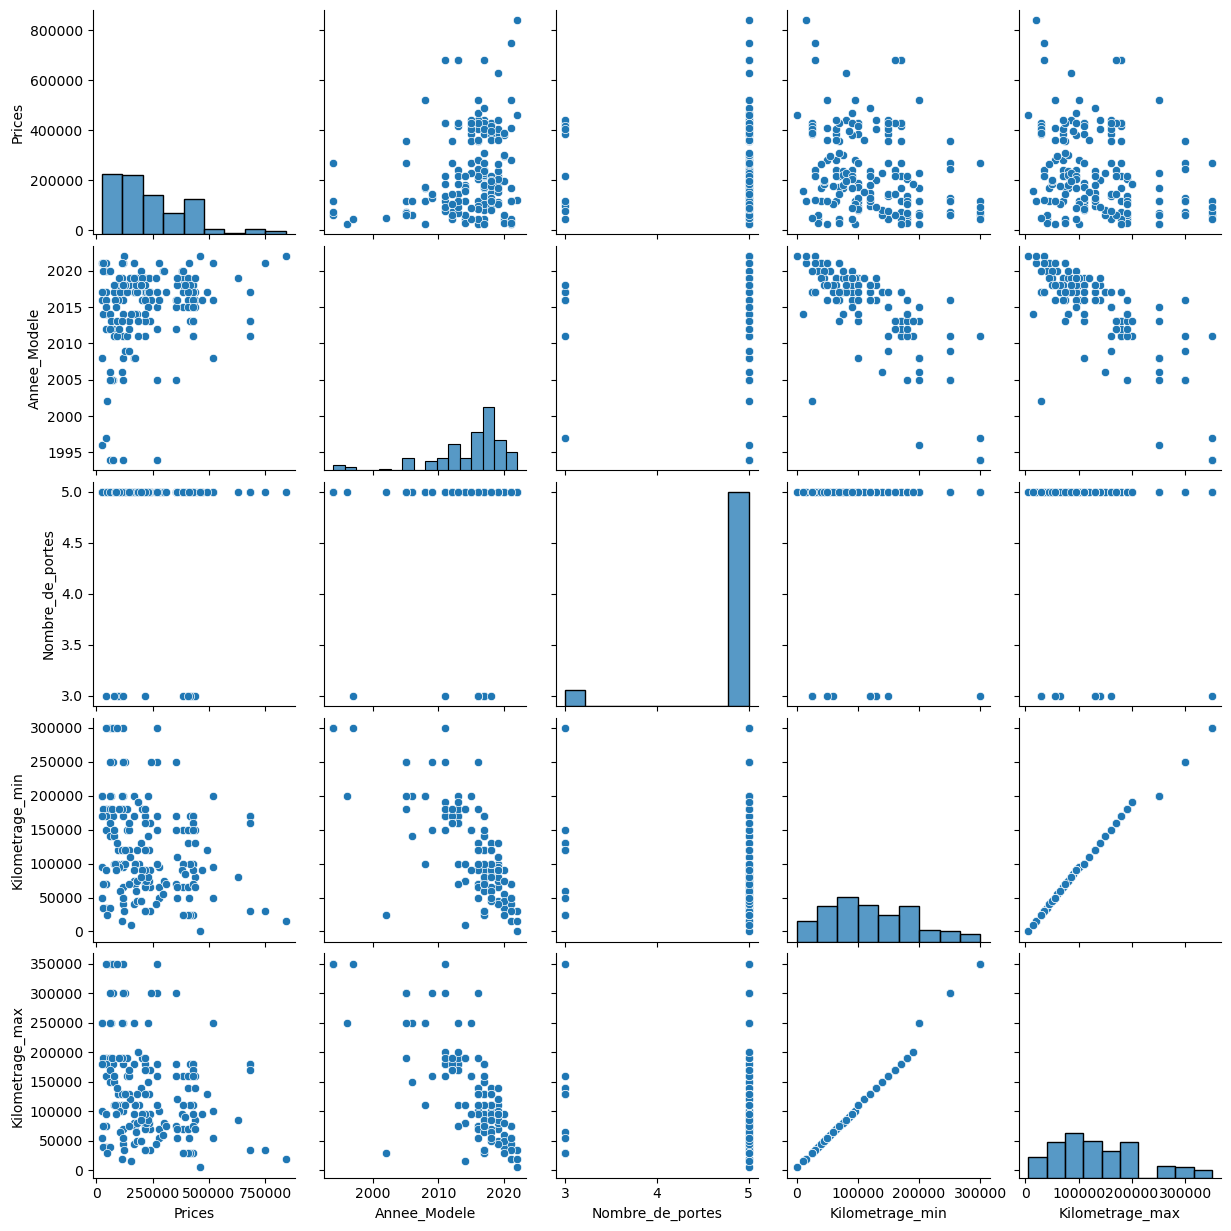

In [ ]:
sns.pairplot(df_concat)
plt.show()

In [ ]:
fig=px.histogram(df_concat,
                 x="Prices",
                 hover_data=df_concat.columns,
                 title="Distribution of the price")
fig.show()

In [ ]:
fig=px.histogram(df_concat,
                 x="title",
                 hover_data=df_concat.columns,
                 title="Distribution of the title")
fig.show()

In [ ]:
fig=px.histogram(df_concat,
                 x="Model",
                 hover_data=df_concat.columns,
                 title="Distribution of the Model")
fig.show()

In [ ]:

fig=px.histogram(df_concat,
                 x="Marque",
                 hover_data=df_concat.columns,
                 title="Distribution of the Marque")
fig.show()

In [ ]:

fig=px.histogram(df_concat,
                 x="Etat",
                 hover_data=df_concat.columns,
                 title="Distribution of the Etat")
fig.show()

In [ ]:
# Regrouper par Etat et calculer la nombre de la prices
df_grouped = df_concat.groupby('Etat').agg({'Prices': 'count'})
df_grouped

,Prices
Etat,
Bon,44
Excellent,66
Très bon,65


In [ ]:
# Réinitialiser l'index groupé
df_grouped = df_grouped.reset_index()
df_grouped

,Etat,Prices
0,Bon,44
1,Excellent,66
2,Très bon,65


In [ ]:
df_grouped = df_grouped.rename(columns={'Prices': 'count'})

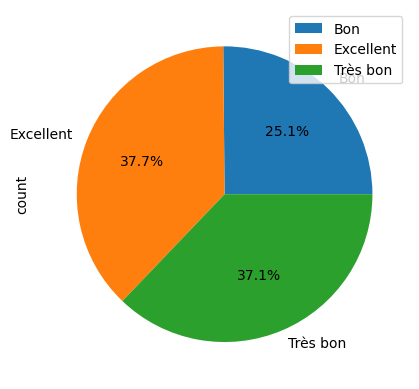

In [ ]:
# Tracer le graphique circulaire
df_grouped.plot.pie(y='count', autopct='%1.1f%%', labels=df_grouped.Etat)
plt.show()

In [ ]:
fig=px.histogram(df_concat,
                 x="Annee_Modele",
                 hover_data=df_concat.columns,
                 title="Distribution of the Annee_Modele")
fig.show()

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df_concat, 
                 x="Prices",
                 color="Origine",
                 hover_data=df_concat.columns,
                 title="la distribution des prix en fonction d origine",
                 barmode="group")
fig.show()

In [ ]:

fig=px.histogram(df_concat, 
                 x="Prices",
                 color="Origine",
                 hover_data=df_concat.columns,
                 title="la distribution des prix en fonction d origine",
                 barmode="group")
fig.show()

In [ ]:

fig=px.histogram(df_concat, 
                 x="Prices",
                 color="Marque",
                 hover_data=df_concat.columns,
                 title="la distribution des prix en fonction de marque",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df_concat, 
                 x="Prices",
                 color="Annee_Modele",
                 hover_data=df_concat.columns,
                 title="la distribution des prix en fonction d annee_Modele",
                 barmode="group")
fig.show()

# Machine Learning

In [ ]:
df_concat

,Prices,title,Model,Marque,Etat,Annee_Modele,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,280000.0,range rover evoque,range rover evoque,land rover,Bon,2016,5.0,WW au Maroc,65000.0,69999.0
3,26000.0,peugeot,accent,hyundai,Très bon,2016,5.0,WW au Maroc,95000.0,99999.0
4,118000.0,hyundai accent diesel 2016,accent,hyundai,Très bon,2021,5.0,WW au Maroc,50000.0,54999.0
5,167000.0,hyundai accent,passat,volkswagen,Excellent,2008,5.0,Dédouanée,200000.0,249999.0
6,440000.0,range sport autobiographie 80000km certifié,classe c coupe,mercedes-benz,Excellent,2017,5.0,Dédouanée,80000.0,84999.0
...,...,...,...,...,...,...,...,...,...,...
210,185000.0,vente audi a4 s-line,a4,audi,Très bon,2013,5.0,WW au Maroc,190000.0,199999.0
211,198000.0,jeep renegade boite auto 2018,renegade,jeep,Excellent,2018,5.0,WW au Maroc,80000.0,84999.0
212,410000.0,range rover evoque,range rover evoque,land rover,Bon,2021,5.0,WW au Maroc,50000.0,54999.0
213,87000.0,dacia logan diesel 2015,logan,dacia,Très bon,2015,5.0,WW au Maroc,90000.0,94999.0


In [ ]:
df_concat = df_concat.reset_index()
df_concat

,index,Prices,title,Model,Marque,Etat,Annee_Modele,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,0,280000.0,range rover evoque,range rover evoque,land rover,Bon,2016,5.0,WW au Maroc,65000.0,69999.0
1,3,26000.0,peugeot,accent,hyundai,Très bon,2016,5.0,WW au Maroc,95000.0,99999.0
2,4,118000.0,hyundai accent diesel 2016,accent,hyundai,Très bon,2021,5.0,WW au Maroc,50000.0,54999.0
3,5,167000.0,hyundai accent,passat,volkswagen,Excellent,2008,5.0,Dédouanée,200000.0,249999.0
4,6,440000.0,range sport autobiographie 80000km certifié,classe c coupe,mercedes-benz,Excellent,2017,5.0,Dédouanée,80000.0,84999.0
...,...,...,...,...,...,...,...,...,...,...,...
170,210,185000.0,vente audi a4 s-line,a4,audi,Très bon,2013,5.0,WW au Maroc,190000.0,199999.0
171,211,198000.0,jeep renegade boite auto 2018,renegade,jeep,Excellent,2018,5.0,WW au Maroc,80000.0,84999.0
172,212,410000.0,range rover evoque,range rover evoque,land rover,Bon,2021,5.0,WW au Maroc,50000.0,54999.0
173,213,87000.0,dacia logan diesel 2015,logan,dacia,Très bon,2015,5.0,WW au Maroc,90000.0,94999.0


In [ ]:
df_concat.isna().sum()

index               0
Prices              0
title               0
Model               0
Marque              0
Etat                0
Annee_Modele        0
Nombre_de_portes    0
Origine             0
Kilometrage_min     0
Kilometrage_max     0
dtype: int64

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             175 non-null    int64  
 1   Prices            175 non-null    float64
 2   title             175 non-null    object 
 3   Model             175 non-null    object 
 4   Marque            175 non-null    object 
 5   Etat              175 non-null    object 
 6   Annee_Modele      175 non-null    int32  
 7   Nombre_de_portes  175 non-null    float64
 8   Origine           175 non-null    object 
 9   Kilometrage_min   175 non-null    float64
 10  Kilometrage_max   175 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 14.5+ KB


In [ ]:
# appliquer OHE à deux colonnes catégorielles
encoded_df = pd.get_dummies(df_concat, columns=['title', 'Model',"Marque","Etat","Origine"])
encoded_df

,index,Prices,Annee_Modele,Nombre_de_portes,Kilometrage_min,Kilometrage_max,title_1ère main x3 2.0d x-line,title_3008 tout neuf,title_alfa romeo giulietta,title_audi a4 full rs4 importé neuve fin 2013,...,Marque_renault,Marque_toyota,Marque_volkswagen,Marque_volvo,Etat_Bon,Etat_Excellent,Etat_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_WW au Maroc
0,0,280000.0,2016,5.0,65000.0,69999.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3,26000.0,2016,5.0,95000.0,99999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4,118000.0,2021,5.0,50000.0,54999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,5,167000.0,2008,5.0,200000.0,249999.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,6,440000.0,2017,5.0,80000.0,84999.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,210,185000.0,2013,5.0,190000.0,199999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
171,211,198000.0,2018,5.0,80000.0,84999.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
172,212,410000.0,2021,5.0,50000.0,54999.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
173,213,87000.0,2015,5.0,90000.0,94999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
encoded_df.shape

(175, 215)

In [ ]:
# la correlation entre les variables 
df_concat.corr()

,index,Prices,Annee_Modele,Nombre_de_portes,Kilometrage_min,Kilometrage_max
index,1.000000,-0.189349,0.107643,0.012218,-0.094565,-0.088629
Prices,-0.189349,1.000000,0.232871,-0.040725,-0.218517,-0.226295
Annee_Modele,0.107643,0.232871,1.000000,0.009235,-0.770019,-0.788902
Nombre_de_portes,0.012218,-0.040725,0.009235,1.000000,0.092923,0.086716
Kilometrage_min,-0.094565,-0.218517,-0.770019,0.092923,1.000000,0.993628
Kilometrage_max,-0.088629,-0.226295,-0.788902,0.086716,0.993628,1.000000


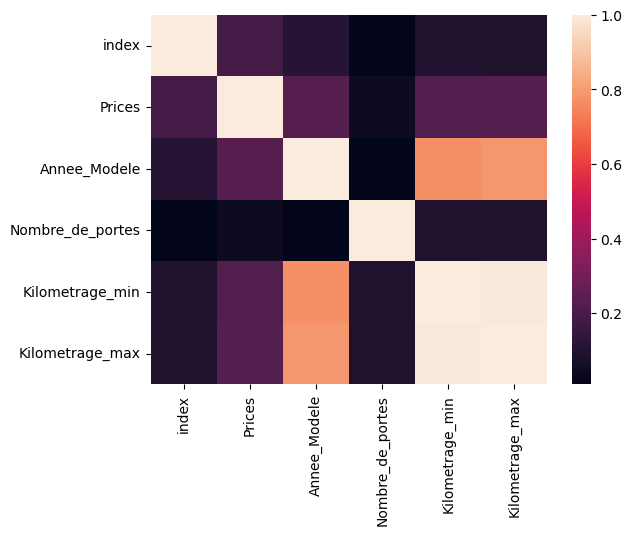

In [ ]:
import seaborn as sns
sns.heatmap(df_concat.corr().abs())
plt.show()

In [ ]:
encoded_df

,index,Prices,Annee_Modele,Nombre_de_portes,Kilometrage_min,Kilometrage_max,title_1ère main x3 2.0d x-line,title_3008 tout neuf,title_alfa romeo giulietta,title_audi a4 full rs4 importé neuve fin 2013,...,Marque_renault,Marque_toyota,Marque_volkswagen,Marque_volvo,Etat_Bon,Etat_Excellent,Etat_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_WW au Maroc
0,0,280000.0,2016,5.0,65000.0,69999.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3,26000.0,2016,5.0,95000.0,99999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4,118000.0,2021,5.0,50000.0,54999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,5,167000.0,2008,5.0,200000.0,249999.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,6,440000.0,2017,5.0,80000.0,84999.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,210,185000.0,2013,5.0,190000.0,199999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
171,211,198000.0,2018,5.0,80000.0,84999.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
172,212,410000.0,2021,5.0,50000.0,54999.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
173,213,87000.0,2015,5.0,90000.0,94999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
encoded_df = encoded_df.drop(['index'], axis=1)


KeyError: "['index'] not found in axis"

In [ ]:
encoded_df

,Prices,Annee_Modele,Nombre_de_portes,Kilometrage_min,Kilometrage_max,title_1ère main x3 2.0d x-line,title_3008 tout neuf,title_alfa romeo giulietta,title_audi a4 full rs4 importé neuve fin 2013,title_audi a4 importé neuve,...,Marque_renault,Marque_toyota,Marque_volkswagen,Marque_volvo,Etat_Bon,Etat_Excellent,Etat_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_WW au Maroc
0,280000.0,2016,5.0,65000.0,69999.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,26000.0,2016,5.0,95000.0,99999.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,118000.0,2021,5.0,50000.0,54999.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,167000.0,2008,5.0,200000.0,249999.0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,440000.0,2017,5.0,80000.0,84999.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,185000.0,2013,5.0,190000.0,199999.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
171,198000.0,2018,5.0,80000.0,84999.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
172,410000.0,2021,5.0,50000.0,54999.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
173,87000.0,2015,5.0,90000.0,94999.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Split the dataset into features (X) and target (y)
X = encoded_df.iloc[:, :-1].values
y = encoded_df.Prices.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# LinearRegression

In [ ]:
# Create the linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training set
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
predictions = model.predict(x_test)

In [ ]:
lescore = r2_score(predictions, y_test)
print('Le score r^2 pour la  Regression Linéaire est {}'.format(lescore))

Le score r^2 pour la  Regression Linéaire est 1.0


In [ ]:
# Create a DataFrame from y_test and predictions
results = pd.concat([pd.Series(y_test), pd.Series(predictions)], axis=1)
results.columns = ['y_test', 'predictions']

In [ ]:
results

,y_test,predictions
0,26000.0,26000.0
1,93000.0,93000.0
2,680000.0,680000.0
3,118000.0,118000.0
4,135000.0,135000.0
5,172000.0,172000.0
6,415000.0,415000.0
7,79999.0,79999.0
8,220000.0,220000.0
9,25000.0,25000.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



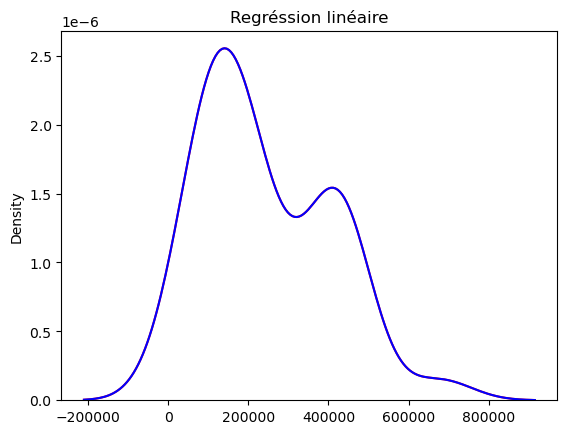

In [ ]:
sns.distplot(predictions, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("Regréssion linéaire")
plt.show()

# RandomForestRegressor

In [ ]:
# Create a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training set
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing set
predictions = model.predict(x_test)
predictions

array([ 27150.,  93850., 691600., 117970., 134960., 170950., 413720.,
        81700., 216000.,  27730., 145680.,  71420., 406250.,  72100.,
        98020., 213170., 215430., 117870., 430400., 241150., 431400.,
       357340., 431900., 182690., 414220., 123160., 461450., 276930.,
       202300., 115300., 431450., 167690., 144130., 357170., 430600.])

In [ ]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean squared error:", mse)

Mean squared error: 19097917.171428572


In [ ]:
lescoreRFR = r2_score(predictions, y_test)
print('Le score r^2 pour la  Random Forest Regressor {}'.format(lescoreRFR))

Le score r^2 pour la  Random Forest Regressor 0.9992322344929232


In [ ]:
# Create a DataFrame from y_test and predictions
results = pd.concat([pd.Series(y_test), pd.Series(predictions)], axis=1)
results.columns = ['y_test', 'predictions']
results

,y_test,predictions
0,26000.0,27150.0
1,93000.0,93850.0
2,680000.0,691600.0
3,118000.0,117970.0
4,135000.0,134960.0
5,172000.0,170950.0
6,415000.0,413720.0
7,79999.0,81700.0
8,220000.0,216000.0
9,25000.0,27730.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



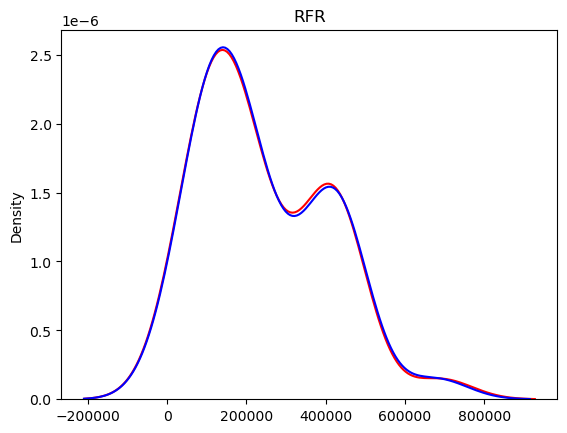

In [ ]:
sns.distplot(predictions, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("RFR")
plt.show()

In [ ]:
# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

In [ ]:
# Train the model on the training set
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# Make predictions on the testing set
predictions = model.predict(x_test)

In [ ]:
lescoreRFR = r2_score(predictions, y_test)
print('Le score r^2 pour la  Random Forest Regressor {}'.format(lescoreRFR))

Le score r^2 pour la  Random Forest Regressor 0.9705825522480301


In [ ]:
# Create a DataFrame from y_test and predictions
results = pd.concat([pd.Series(y_test), pd.Series(predictions)], axis=1)
results.columns = ['y_test', 'predictions']

In [ ]:
results

,y_test,predictions
0,26000.0,49777.777778
1,93000.0,115370.370370
2,680000.0,667500.000000
3,118000.0,115370.370370
4,135000.0,115370.370370
5,172000.0,190592.592593
6,415000.0,398827.586207
7,79999.0,115370.370370
8,220000.0,190592.592593
9,25000.0,49777.777778


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



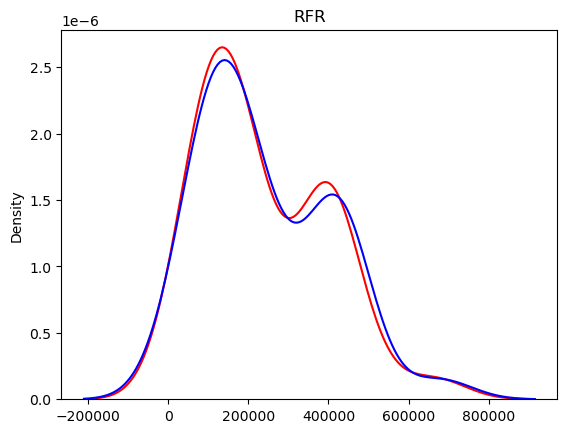

In [ ]:
sns.distplot(predictions, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("RFR")
plt.show()